In [1]:
import pymn
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np
import mkl

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?


In [2]:
mkl.set_num_threads(16)

16

In [3]:
def get_go_annotations_as_panda(species):
    import pandas as pd
    ## TAXA_ID to species_name 
    if type(species) == int:
        mapper = pd.read_csv('/home/passala/Gene_duplication_project/Generated_tables/Time_Savers/Species_name_resolver.csv')
        species = mapper['Common Name'].loc[mapper['Taxa ID'] == species].item()

    ## Get file_location 
    file_location = '/data/CoCoCoNet/gene2go/' + species + '_gene2go.csv'
    original_csv = pd.read_csv(file_location,sep = ' ')
    if len(original_csv) == 0:
        raise NameError('No Annotations for this Species :(')
    original_csv = original_csv.dropna()
    original_csv['Present'] = 1 
    matrixed_version = original_csv.pivot(index = 'NetworkIDs',columns = 'GO_term',values = 'Present')
    filled_matrixed_version = matrixed_version.fillna(value = 0)
    return filled_matrixed_version

In [4]:
sorghum_norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Sorghum_NormalizedData.csv')
sorghum_norm_data = sorghum_norm_data.T


maize_norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Maize_NormalizedData.csv')
maize_norm_data = maize_norm_data.T

millet_norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Setaria_NormalizedData.csv')
millet_norm_data = millet_norm_data.T



In [2]:
sorghum_mapped_genes = sorghum_norm_data.var_names[sorghum_norm_data.var_names.str.startswith(pat = 'Zm')]
millet_mapped_genes = millet_norm_data.var_names[millet_norm_data.var_names.str.startswith(pat = 'Zm')]
maize_all_genes = maize_norm_data.var_names
sorghum_and_millet_mapped_genes = sorghum_mapped_genes.intersection(other = millet_mapped_genes)
maize_sorghum_millet_overlap = sorghum_and_millet_mapped_genes.intersection(other = maize_all_genes)
maize_sorghum_millet_overlap

NameError: name 'sorghum_norm_data' is not defined

In [6]:
sorghum_subset = sorghum_norm_data[:,maize_sorghum_millet_overlap]
maize_subset = maize_norm_data[:,maize_sorghum_millet_overlap]
millet_subset = millet_norm_data[:,maize_sorghum_millet_overlap]

In [7]:
identity_of_millet_cells = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Setaria_Cell_Identity.csv',index_col = 0)
identity_of_maize_cells = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Maize_Cell_Identity.csv',index_col = 0)
identity_of_sorghum_cells = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Sorghum_Cell_Identity.csv',index_col = 0)
millet_subset.obs['Cell Cluster Annotation'] = identity_of_millet_cells['Annotation']
millet_subset.obs['Species'] = 'Millet'
maize_subset.obs['Cell Cluster Annotation'] = identity_of_maize_cells['Annotation']
maize_subset.obs['Species'] = 'Maize'
sorghum_subset.obs['Cell Cluster Annotation'] = identity_of_sorghum_cells['Annotation']
sorghum_subset.obs['Species'] = 'Sorghum'

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [8]:
species_all_merged = ad.concat([sorghum_subset,maize_subset,millet_subset])

In [9]:
species_all_merged.obs['Cluster and Type'] = species_all_merged.obs['Cell Cluster Annotation']
species_all_merged.obs['Cluster and Type'].loc[species_all_merged.obs_names.str.contains('Nucl')] = species_all_merged.obs['Cluster and Type'] + ' Nucl'
species_all_merged.obs['Cluster and Type'].loc[species_all_merged.obs_names.str.contains('Cell')] = species_all_merged.obs['Cluster and Type'] + ' Cell'
species_all_merged.obs

,Cell Cluster Annotation,Species,Cluster and Type
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell
...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell


In [10]:
species_all_merged.obs['Cluster and Species'] = species_all_merged.obs['Cell Cluster Annotation']
species_all_merged.obs['Cluster and Species'].loc[species_all_merged.obs['Species'].str.contains('Maize')] = species_all_merged.obs['Cluster and Type'] + ' Maize'
species_all_merged.obs['Cluster and Species'].loc[species_all_merged.obs['Species'].str.contains('Millet')] = species_all_merged.obs['Cluster and Type'] + ' Millet'
species_all_merged.obs['Cluster and Species'].loc[species_all_merged.obs['Species'].str.contains('Sorghum')] = species_all_merged.obs['Cluster and Type'] + ' Sorghum'
species_all_merged.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
...,...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet


In [11]:
species_all_merged.obs['Type'] = np.nan
species_all_merged.obs['Type'].loc[species_all_merged.obs_names.str.contains('Nucl')] = 'Nucl'
species_all_merged.obs['Type'].loc[species_all_merged.obs_names.str.contains('Cell')] = 'Cell'
species_all_merged.obs

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
...,...,...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell


In [12]:
species_all_merged_across_cell_types_as_batches = species_all_merged.copy()
data_for_all_species_done_by_cell_and_species = species_all_merged.copy()

In [13]:
np.stack(data_for_all_species_done_by_cell_and_species.obs_names.str.split('_').to_numpy(),axis = 0)[:,1]

array(['Cell', 'Cell', 'Cell', ..., 'Cell', 'Cell', 'Cell'], dtype='<U16')

In [14]:
data_for_all_species_done_by_cell_and_species.obs['Type and Species'] = data_for_all_species_done_by_cell_and_species.obs['Species'] + ' '+  data_for_all_species_done_by_cell_and_species.obs['Type']

In [15]:
supervised_metaneighbor_base = data_for_all_species_done_by_cell_and_species.copy()
go_groups_full_supervised_metaneighbor = data_for_all_species_done_by_cell_and_species.copy()

In [16]:
all_go_terms = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/go_terms.txt',sep = '\t')
all_go_terms['Name'] = all_go_terms['Name'] +' |' + ' ' + all_go_terms.index
dictionary_of_go_names = all_go_terms.to_dict()['Name']

In [17]:
maize_annotations = get_go_annotations_as_panda('maize')
maize_annotations_subset = maize_annotations[maize_annotations.index.isin(species_all_merged.var_names)]

In [18]:
go_slim_plant_annotations = pd.read_csv('/data/passala/Generated_Tables/plant_go_slim_terms.csv')
maize_annotations_go_slim_plants = maize_annotations_subset[maize_annotations_subset.columns.intersection(go_slim_plant_annotations['GO Term'].to_list())]
annotation_sizes = maize_annotations_go_slim_plants.sum()

In [19]:
maize_annotations_subset_by_size =maize_annotations_go_slim_plants.loc[:,(annotation_sizes>4) & (annotation_sizes < 1000)]
maize_annotations_subset_by_size

GO_term,GO:0000003,GO:0003682,GO:0003774,GO:0004518,GO:0005102,GO:0005198,GO:0005576,GO:0005618,GO:0005635,GO:0005654,...,GO:0019748,GO:0030154,GO:0030234,GO:0030246,GO:0038023,GO:0040007,GO:0040029,GO:0045182,GO:0048856,GO:0065009
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Zm00001d000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000011,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d054104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
maize_annotations_subset_by_size = maize_annotations_subset_by_size.rename(columns = dictionary_of_go_names)
maize_annotations_subset = maize_annotations_subset.rename(columns = dictionary_of_go_names)

In [21]:
full_subset_sizes = maize_annotations_subset.sum()

In [22]:
full_annotations_subset_by_size = maize_annotations_subset.loc[:,(full_subset_sizes>9) & (full_subset_sizes < 1000)]

In [23]:
full_annotations_subset_by_size

GO_term,reproduction | GO:0000003,phosphopyruvate hydratase complex | GO:0000015,regulation of DNA recombination | GO:0000018,ribosomal large subunit assembly | GO:0000027,ribosomal small subunit assembly | GO:0000028,mannosyltransferase activity | GO:0000030,acyl carrier activity | GO:0000036,transition metal ion transport | GO:0000041,autophagosome assembly | GO:0000045,tRNA binding | GO:0000049,...,"regulation of ATP-dependent microtubule motor activity, plus-end-directed | GO:2000580","positive regulation of ATP-dependent microtubule motor activity, plus-end-directed | GO:2000582",regulation of phenylpropanoid metabolic process | GO:2000762,regulation of cytoplasmic translation | GO:2000765,negative regulation of mitotic sister chromatid separation | GO:2000816,regulation of response to DNA damage stimulus | GO:2001020,reactive nitrogen species metabolic process | GO:2001057,starch binding | GO:2001070,negative regulation of chromosome organization | GO:2001251,positive regulation of chromosome organization | GO:2001252
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Zm00001d000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Zm00001d000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d054104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
supervised_metaneighbor_base.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type,Type and Species
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
...,...,...,...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell


In [25]:
pymn.MetaNeighbor(adata = supervised_metaneighbor_base, study_col = 'Species', ct_col = 'Cell Cluster Annotation', genesets = maize_annotations_subset_by_size, fast_version = True, fast_hi_mem = True)
supervised_metaneighbor_base.uns['MetaNeighbor'].to_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/fast_version_plant_go_slim_metaneighbor_aurocs.csv')

In [26]:
aurocs = pd.read_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/fast_version_plant_go_slim_metaneighbor_aurocs.csv',index_col = 0)
supervised_metaneighbor_base.uns['MetaNeighbor_params'] = {'study_col':'Species','ct_col':'Cell Cluster Annotation'}


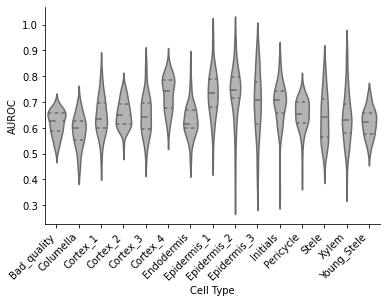

In [27]:
pymn.plotMetaNeighbor(aurocs)


In [28]:
gs_size = maize_annotations_subset_by_size.sum()
aurocs.loc['average_auroc'] = aurocs.mean()
aurocs.loc['gs_size'] = gs_size[aurocs.columns]


In [29]:
aurocs.T.sort_values('average_auroc',ascending = False).head(10)

Cell Type,Bad_quality,Columella,Cortex_1,Cortex_2,Cortex_3,Cortex_4,Endodermis,Epidermis_1,Epidermis_2,Epidermis_3,Initials,Pericycle,Stele,Xylem,Young_Stele,average_auroc,gs_size
extracellular region | GO:0005576,0.612700,0.682986,0.826048,0.742513,0.843943,0.849370,0.838511,0.943271,0.933782,0.896155,0.762994,0.714351,0.835339,0.885579,0.683030,0.803371,529.0
cell wall | GO:0005618,0.602648,0.639737,0.783323,0.766296,0.810550,0.761434,0.761440,0.947106,0.930896,0.898712,0.794445,0.691109,0.827949,0.778737,0.699662,0.779603,285.0
vacuole | GO:0005773,0.674733,0.607670,0.796104,0.742018,0.722852,0.799322,0.745120,0.828340,0.843493,0.891584,0.711341,0.691479,0.730054,0.889662,0.647980,0.754784,396.0
lipid metabolic process | GO:0006629,0.652495,0.647051,0.753937,0.744690,0.828019,0.803669,0.686668,0.825989,0.784630,0.763834,0.716272,0.739186,0.824574,0.753454,0.678113,0.746839,928.0
response to abiotic stimulus | GO:0009628,0.690237,0.510002,0.771338,0.733883,0.737578,0.817141,0.692441,0.846981,0.812621,0.884324,0.755578,0.711693,0.765049,0.740626,0.674228,0.742915,543.0
Golgi apparatus | GO:0005794,0.659881,0.673919,0.729487,0.702705,0.626115,0.782243,0.657639,0.847800,0.924327,0.868977,0.731495,0.686053,0.753118,0.802036,0.672644,0.741229,836.0
generation of precursor metabolites and energy | GO:0006091,0.623014,0.623344,0.695400,0.747257,0.657427,0.809345,0.672092,0.777965,0.819425,0.821702,0.719169,0.707373,0.812854,0.785070,0.631987,0.726895,549.0
response to endogenous stimulus | GO:0009719,0.643482,0.616396,0.710035,0.649598,0.679992,0.788999,0.662310,0.810721,0.809209,0.777694,0.733115,0.719651,0.739427,0.744313,0.639988,0.714995,597.0
endoplasmic reticulum | GO:0005783,0.650903,0.671798,0.665821,0.691302,0.684397,0.745724,0.653422,0.791462,0.830295,0.819476,0.733919,0.696967,0.764307,0.618588,0.646318,0.710980,590.0
response to external stimulus | GO:0009605,0.639825,0.489307,0.694422,0.676750,0.736164,0.804796,0.660867,0.852149,0.824205,0.810536,0.768787,0.696771,0.713327,0.652640,0.642073,0.710841,322.0


In [30]:
pymn.MetaNeighbor(adata = go_groups_full_supervised_metaneighbor, study_col = 'Species', ct_col = 'Cell Cluster Annotation', genesets = full_annotations_subset_by_size, fast_version = True, fast_hi_mem = True)
go_groups_full_supervised_metaneighbor.uns['MetaNeighbor'].to_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/fast_all_go_groups_metaneighbor.csv')

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/MetaNeighbor.py:175: RuntimeWarning: invalid value encountered in true_divide


In [31]:
aurocs_all_go = pd.read_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/fast_all_go_groups_metaneighbor.csv',index_col = 0)
go_groups_full_supervised_metaneighbor.uns['MetaNeighbor_params'] = {'study_col':'Species','ct_col':'Cell Cluster Annotation'}


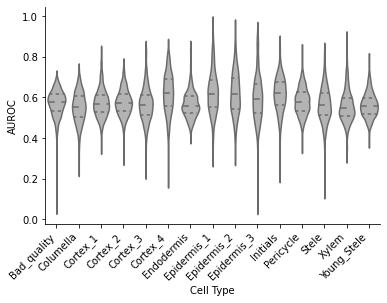

In [32]:
pymn.plotMetaNeighbor(aurocs_all_go)


In [33]:
aurocs_all_go.loc['average_auroc'] = aurocs_all_go.mean()
aurocs_all_go.loc['gs_size'] = full_annotations_subset_by_size.sum()[aurocs_all_go.columns]

In [35]:
aurocs_all_go.T.sort_values('average_auroc',ascending = False).head(10)

Cell Type,Bad_quality,Columella,Cortex_1,Cortex_2,Cortex_3,Cortex_4,Endodermis,Epidermis_1,Epidermis_2,Epidermis_3,Initials,Pericycle,Stele,Xylem,Young_Stele,average_auroc,gs_size
extracellular region | GO:0005576,0.612700,0.682986,0.826048,0.742513,0.843943,0.849370,0.838511,0.943271,0.933782,0.896155,0.762994,0.714351,0.835339,0.885579,0.683030,0.803371,529.0
drug metabolic process | GO:0017144,0.622768,0.662390,0.800401,0.759397,0.833660,0.824108,0.852317,0.907345,0.868177,0.883418,0.747516,0.733352,0.809064,0.763218,0.652374,0.781300,526.0
cell wall | GO:0005618,0.602648,0.639737,0.783323,0.766296,0.810550,0.761434,0.761440,0.947106,0.930896,0.898712,0.794445,0.691109,0.827949,0.778737,0.699662,0.779603,285.0
external encapsulating structure | GO:0030312,0.602715,0.639749,0.783313,0.766287,0.810547,0.761421,0.761425,0.947097,0.930888,0.898703,0.794441,0.691094,0.827939,0.778724,0.699646,0.779599,286.0
cellular response to chemical stimulus | GO:0070887,0.651707,0.668083,0.794289,0.718580,0.819925,0.768235,0.785331,0.883923,0.887659,0.880289,0.755426,0.737531,0.788793,0.781074,0.673930,0.772985,758.0
cell wall organization or biogenesis | GO:0071554,0.662198,0.718365,0.765830,0.721015,0.738949,0.786404,0.687507,0.957442,0.934989,0.890174,0.749422,0.679588,0.805055,0.808874,0.680147,0.772397,416.0
response to toxic substance | GO:0009636,0.628687,0.681113,0.781522,0.736746,0.845824,0.768991,0.819501,0.879728,0.857448,0.874540,0.747597,0.728375,0.766795,0.724052,0.685094,0.768401,295.0
drug catabolic process | GO:0042737,0.627175,0.609801,0.747656,0.750684,0.835776,0.811046,0.844732,0.902017,0.861608,0.877376,0.740456,0.700411,0.798367,0.728379,0.648029,0.765568,231.0
inorganic molecular entity transmembrane transporter activity | GO:0015318,0.668204,0.673784,0.823173,0.760556,0.734034,0.832519,0.724562,0.905457,0.888813,0.838218,0.706262,0.745282,0.778071,0.734360,0.658732,0.764802,745.0
cellular carbohydrate metabolic process | GO:0044262,0.641869,0.626598,0.787771,0.757595,0.781249,0.783228,0.759933,0.864907,0.924721,0.850506,0.741780,0.735839,0.789134,0.792802,0.613172,0.763407,446.0
